<a href="https://colab.research.google.com/github/NehaBhatia103/DataScienceAssignments/blob/main/AssignmentDecisionTree_CompanyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data (2).csv


In [97]:
data=pd.read_csv("Company_Data.csv")
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [100]:
data["Sales"].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [101]:
data["Sales_Cat"]= pd.cut(x = data['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [103]:
data.Sales_Cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_Cat, dtype: int64

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_Cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [88]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

# Data Visualization

<Axes: xlabel='CompPrice', ylabel='Sales'>

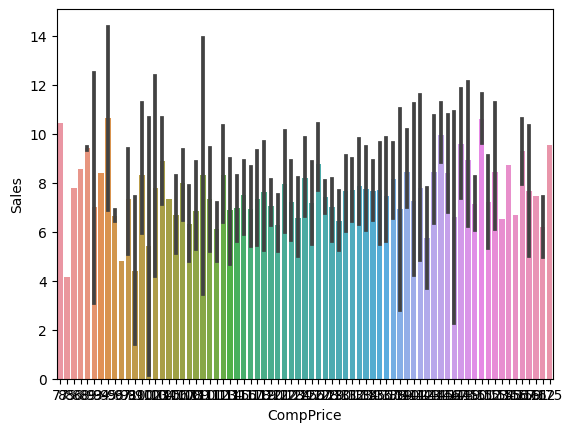

In [89]:
sns.barplot(x="CompPrice",y="Sales",data=data)

<Axes: xlabel='CompPrice', ylabel='Sales'>

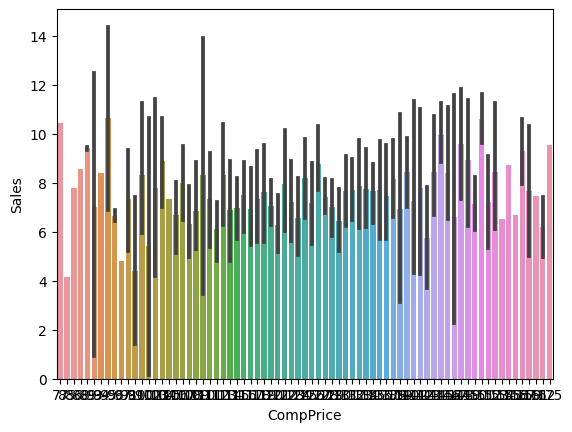

In [90]:
sns.barplot(x="CompPrice",y="Sales",data=data)

<Axes: xlabel='Income', ylabel='Sales'>

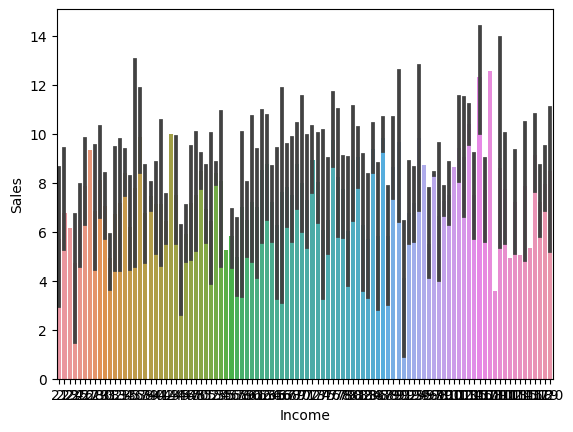

In [91]:
sns.barplot(x="Income",y="Sales",data=data)

<Axes: xlabel='Advertising', ylabel='Sales'>

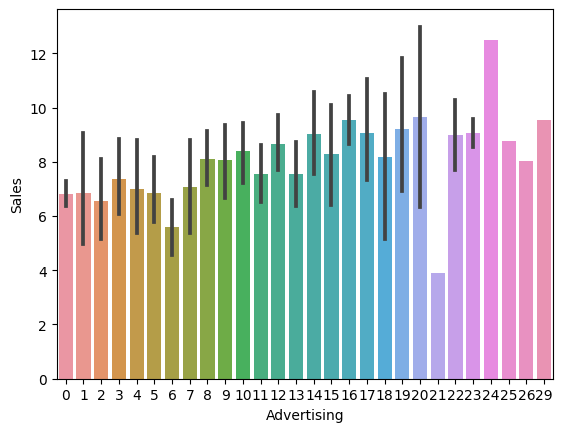

In [92]:
sns.barplot(x="Advertising",y="Sales",data=data)

<Axes: xlabel='Population', ylabel='Sales'>

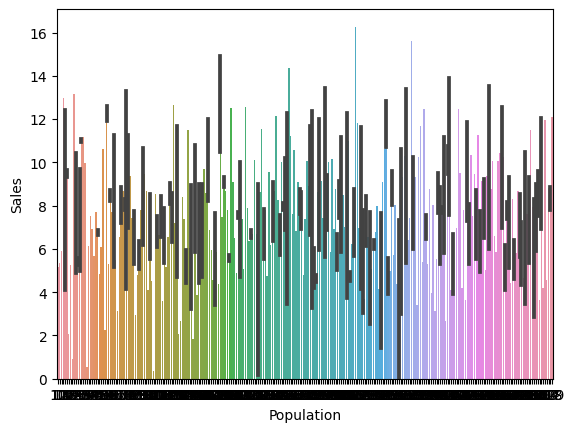

In [93]:
sns.barplot(x="Population",y="Sales",data=data)

<Axes: xlabel='Price', ylabel='Sales'>

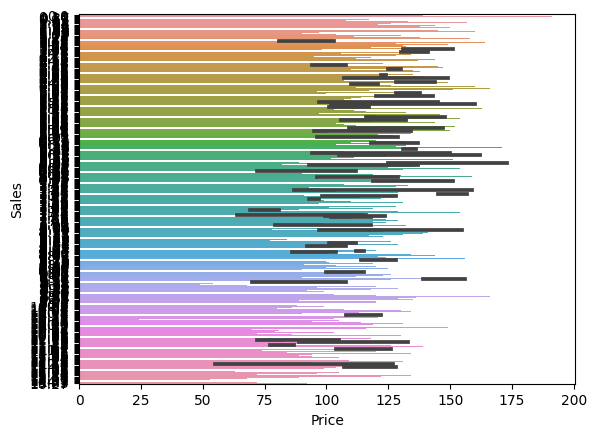

In [54]:
sns.barplot(x="Price",y="Sales",data=data)

<Axes: xlabel='Age', ylabel='Sales'>

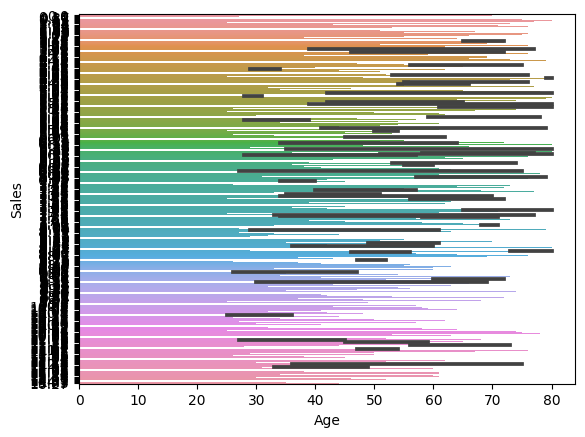

In [55]:
sns.barplot(x="Age",y="Sales",data=data)

<Axes: xlabel='Education', ylabel='Sales'>

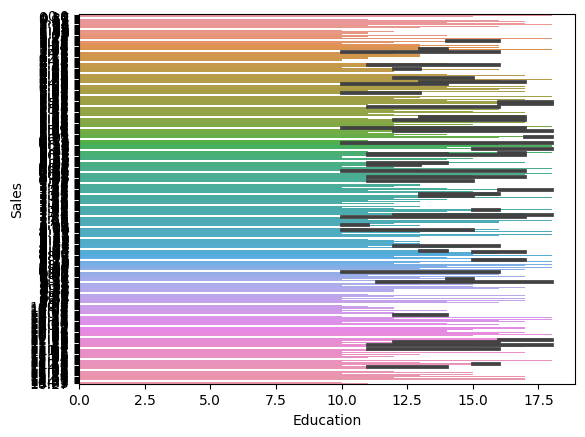

In [56]:
sns.barplot(x="Education",y="Sales",data=data)

#Preprocessing

In [104]:
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [106]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Urban"]=encoder.fit_transform(data["Urban"])
data["US"]=encoder.fit_transform(data["US"])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,3,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,3,38,13,1,0,Low


In [107]:
data.Sales_Cat=encoder.fit_transform(data.Sales_Cat)


In [108]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,3,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,3,38,13,1,0,1


In [109]:
x=data.iloc[:,:-1]
x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [117]:
y=data.Sales_Cat
y.value_counts()

2    198
0    102
1    100
Name: Sales_Cat, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [119]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.6, 0.8333333333333334, 'x[0] <= 9.315\nentropy = 1.499\nsamples = 320\nvalue = [83, 77, 160]'),
 Text(0.4, 0.5, 'x[0] <= 5.44\nentropy = 0.91\nsamples = 237\nvalue = [0, 77, 160]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 77\nvalue = [0, 77, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 160\nvalue = [0, 0, 160]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 83\nvalue = [83, 0, 0]')]

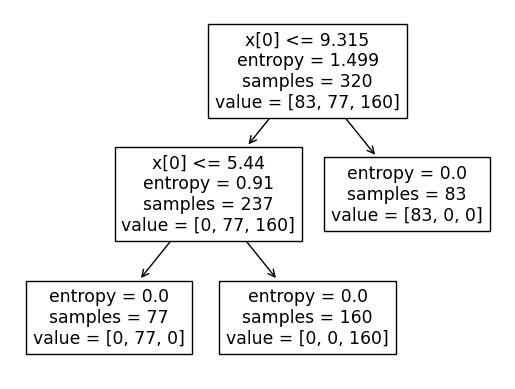

In [120]:
from sklearn import tree
tree.plot_tree(model)

Predictions on test Data

In [122]:
preds=model.predict(x_test)

In [123]:
preds

array([0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1])

In [124]:
pd.Series(preds).value_counts()

2    36
1    25
0    19
dtype: int64

In [125]:
np.mean(preds==y_test)


0.975

Builing Model using Gini Criteria

In [126]:
model_gini=DecisionTreeClassifier(criterion="gini",max_depth=3)

In [127]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [128]:
predGini=model.predict(x_test)
np.mean(predGini==y_test)

0.975